In [3]:
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import plotting
from scipy import stats
from sklearn import base
from sklearn import compose, impute, pipeline, preprocessing
from sklearn import linear_model, tree, ensemble, svm
from sklearn import metrics, model_selection
from sklearn.externals import joblib


In [12]:

neom_data = pd.read_csv("/Users/hiba/Downloads/neom_data.csv")


In [13]:
neom_data.head()


,Date &Time,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI(W/m2),SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
0,01/01/2008 0:00,1012.751,14.887,2.606,2.669,105.078,43.686,0.0,0.0,0.0,0.0,0.0,0.098
1,01/01/2008 1:00,1012.917,14.429,3.363,2.667,106.699,47.442,0.0,0.0,0.0,0.0,0.0,0.098
2,01/01/2008 2:00,1012.966,14.580,3.778,3.341,112.426,48.357,0.0,0.0,0.0,0.0,0.0,0.098
3,01/01/2008 3:00,1013.247,14.390,3.507,3.141,102.371,48.125,0.0,0.0,0.0,0.0,0.0,0.098
4,01/01/2008 4:00,1013.083,14.388,3.869,3.607,111.300,49.295,0.0,0.0,0.0,0.0,0.0,0.098


In [ ]:

neom_data2 = pd.read_csv("/Users/hiba/Downloads/neom_data.csv", {})



In [15]:
neom_data.tail()

,Date &Time,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI(W/m2),SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
96427,31/12/2018 19:00,1019.779,14.653,4.380,3.587,25.919,50.340,0.0,0.0,0.0,0.0,0.0,0.098
96428,31/12/2018 20:00,1019.578,13.965,2.853,2.836,35.203,47.381,0.0,0.0,0.0,0.0,0.0,0.098
96429,31/12/2018 21:00,1019.172,13.624,1.923,1.922,85.974,45.275,0.0,0.0,0.0,0.0,0.0,0.098
96430,31/12/2018 22:00,1018.610,13.918,1.512,2.512,103.656,43.211,0.0,0.0,0.0,0.0,0.0,0.098
96431,31/12/2018 23:00,1018.611,13.442,0.733,3.146,91.084,41.836,0.0,0.0,0.0,0.0,0.0,0.098


In [17]:
neom_data.describe()

,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI(W/m2),SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,1010.110794,24.896298,11.045605,3.991582,164.200525,46.168410,274.757261,211.082623,331.746291,63.674490,0.009041,0.098086
std,5.613583,6.382410,7.153472,2.485326,102.793404,17.874776,355.287896,296.287340,390.765915,91.856426,0.173081,0.000805
min,996.378000,4.571000,-22.946000,0.076000,0.672000,5.708000,0.000000,0.000000,0.000000,0.000000,-0.037000,0.096000
25%,1005.539750,20.221000,5.889750,2.152000,62.935500,32.173000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
50%,1010.050000,25.421000,11.324500,3.437000,149.692000,44.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
75%,1014.316000,29.466000,16.581250,5.342000,265.977750,58.859000,579.205250,429.275500,788.745750,121.765250,0.000000,0.099000
max,1029.022000,44.186000,27.196000,16.716000,359.620000,99.929000,1103.190000,954.562000,989.816000,856.685000,14.038000,0.100000


In [20]:
neom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 13 columns):
Date &Time         96432 non-null object
mslp(hPa)          96432 non-null float64
t2(C)              96432 non-null float64
td2(C)             96432 non-null float64
wind_speed(m/s)    96432 non-null float64
wind_dir(Deg)      96432 non-null float64
rh(%)              96432 non-null float64
GHI(W/m2)          96432 non-null float64
SWDIR(W/m2)        96432 non-null float64
SWDNI(W/m2)        96432 non-null float64
SWDIF(W/m2)        96432 non-null float64
rain(mm)           96432 non-null float64
AOD                96432 non-null float64
dtypes: float64(12), object(1)
memory usage: 9.6+ MB


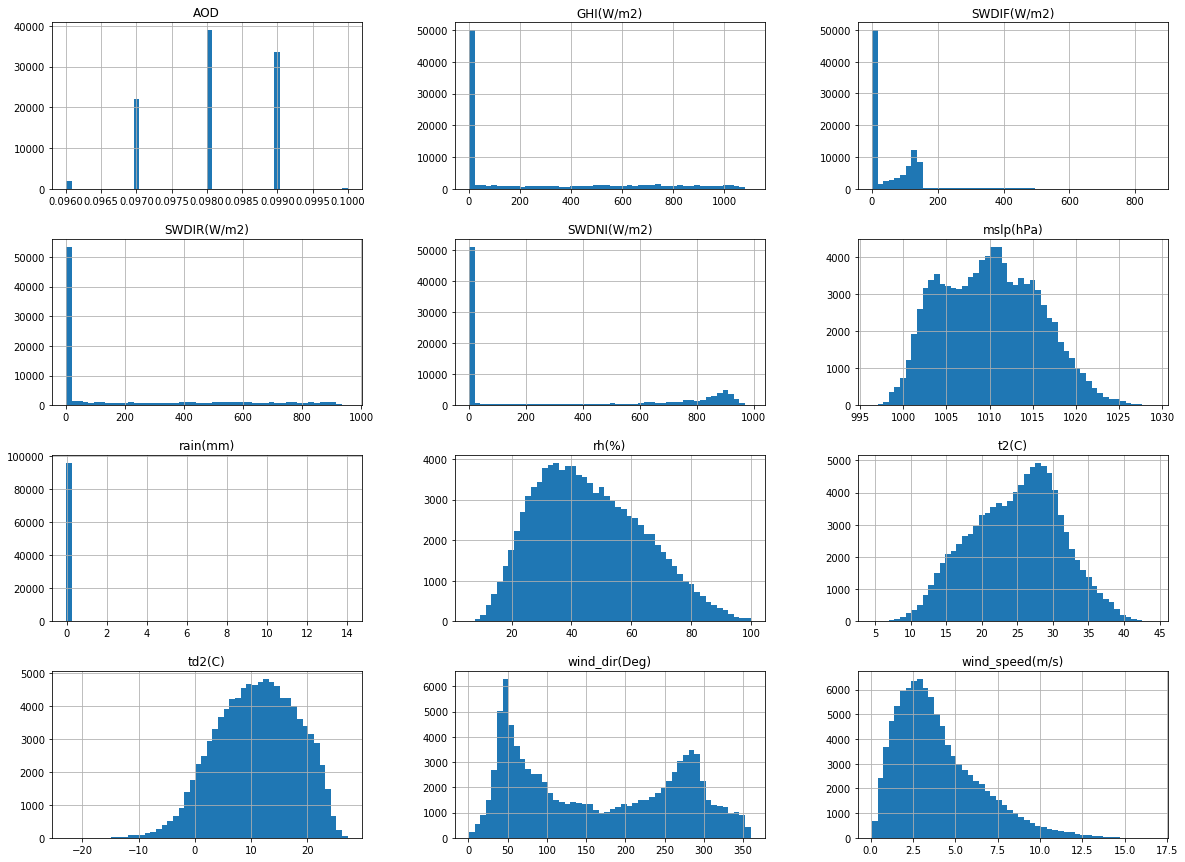

In [22]:
_ = neom_data.hist(bins=50, figsize=(20, 15))

In [27]:
neom_data2 = pd.read_csv("/Users/hiba/Downloads/neom_data.csv", usecols = ['Da''t2(C)','GHI(W/m2)'])

In [28]:
neom_data2.head()


,t2(C),GHI(W/m2)
0,14.887,0.0
1,14.429,0.0
2,14.580,0.0
3,14.390,0.0
4,14.388,0.0
